# Home Loan Approval Prediction

Here we will demonstrate and end to end real time home loan approval prediction

## 1. Importing necassary Libraries

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn import metrics

## 2. Loading Data

In [2]:
df_data = pd.read_csv('train_data.csv')
df_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#Lets rename the columns names to be in same format
df_data = df_data.rename(columns = {'ApplicantIncome' :'Applicant_Income','CoapplicantIncome':'Coapplicant_Income','LoanAmount':'Loan_Amount'})
df_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## 3. Exploratory Data Analysis

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              601 non-null    object 
 2   Married             611 non-null    object 
 3   Dependents          599 non-null    object 
 4   Education           614 non-null    object 
 5   Self_Employed       582 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         592 non-null    float64
 9   Loan_Amount_Term    600 non-null    float64
 10  Credit_History      564 non-null    float64
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df_data.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In this Loan approval context, gender is not something that should be considered and it will also create bias in the model. Hence considering the principles of
Ethical AI, we will be removing from the model training along with Loan ID which is just identifier for each records

In [6]:
df_data = df_data.drop(columns = ['Gender','Loan_ID'])

In [7]:
cat_cols = [col for col in df_data.columns if df_data[col].dtype == 'object' ]
cat_cols

['Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [8]:
num_cols = [col for col in df_data.columns if df_data[col].dtype != 'object']
num_cols

['Applicant_Income',
 'Coapplicant_Income',
 'Loan_Amount',
 'Loan_Amount_Term',
 'Credit_History']

In [9]:
df_data.isnull().sum()

Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

We could see that the columns Gender, Dependents, Self_Employed, Loan Amount, Loan_Amount_Term and Credit History are having null values

### 3.1 Applicant Income

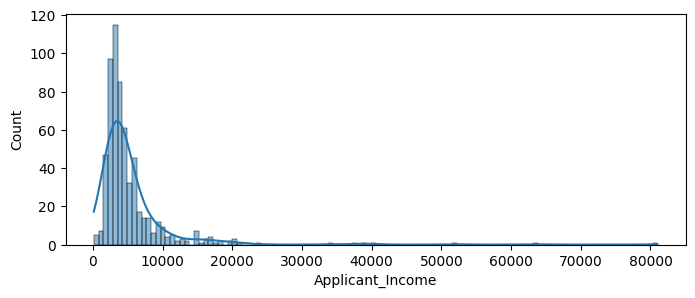

In [10]:
plt.figure(figsize =(8,3))
sns.histplot(df_data['Applicant_Income'],kde = True)
plt.show()

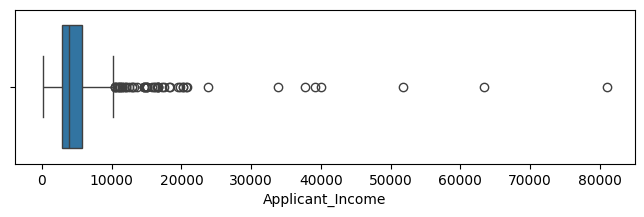

In [11]:

plt.figure(figsize =(8,2))
sns.boxplot(x = 'Applicant_Income',data = df_data)
plt.show()

### 3.2 Co-applicant Income

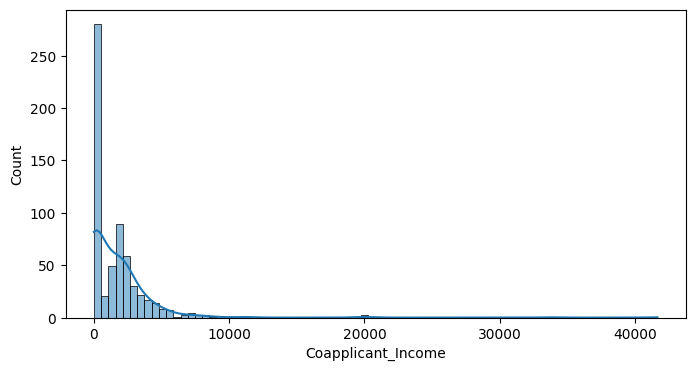

In [12]:
plt.figure(figsize = (8,4))
sns.histplot(df_data['Coapplicant_Income'],kde = True)
plt.show()

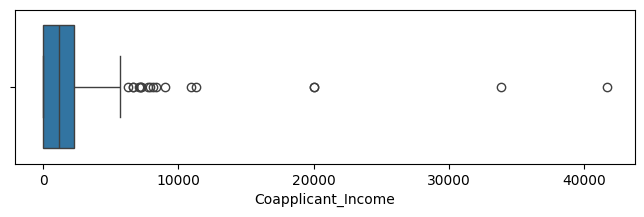

In [13]:
plt.figure(figsize = (8,2))
sns.boxplot(x='Coapplicant_Income',data=df_data)
plt.show()

### 3.3 Loan Amount

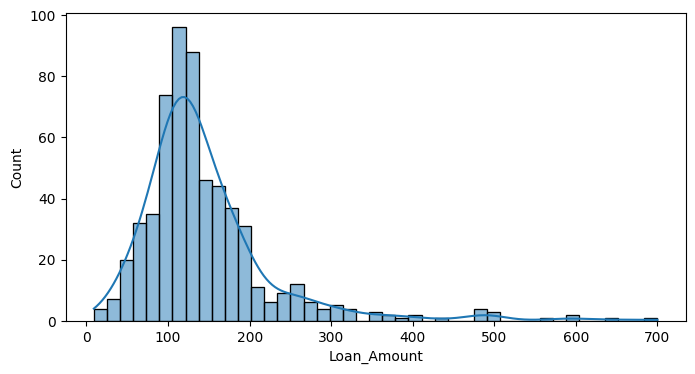

In [14]:
plt.figure(figsize = (8,4))
sns.histplot(df_data['Loan_Amount'],kde=True)
plt.show()

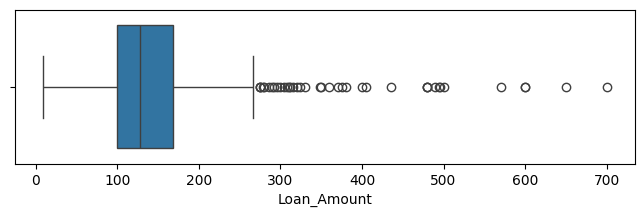

In [15]:
plt.figure(figsize = (8,2))
sns.boxplot(x='Loan_Amount',data = df_data)
plt.show()

### 3.4 Loan Amount Term

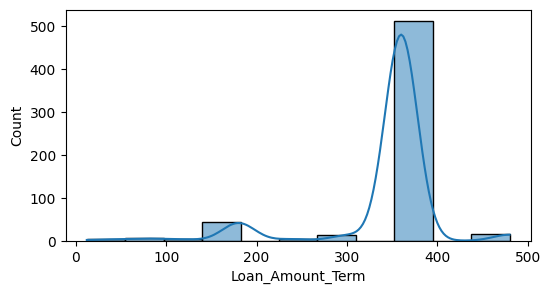

In [16]:
plt.figure(figsize = (6,3))
sns.histplot(df_data['Loan_Amount_Term'],kde = True)
plt.show()

### 3.5 Marital Status

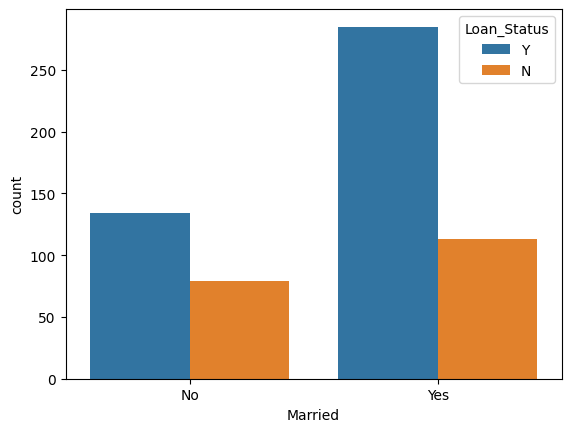

In [17]:
sns.countplot(df_data, x = 'Married',hue = 'Loan_Status')
plt.show()

### 3.6 Dependents

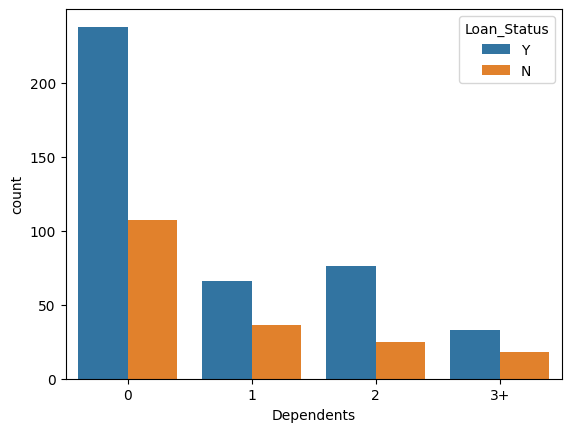

In [18]:
sns.countplot(df_data,x ='Dependents',hue = 'Loan_Status')
plt.show()

### 3.7 Education

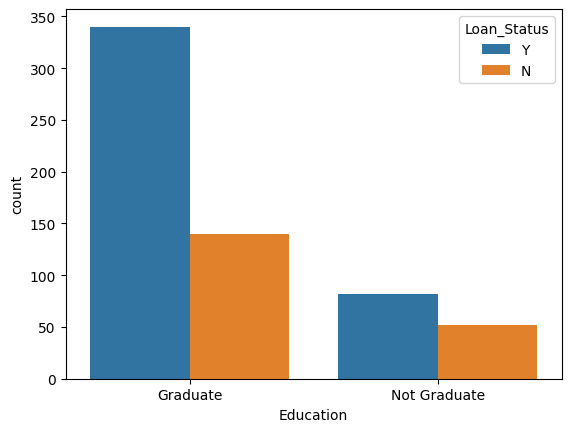

In [19]:
sns.countplot(df_data, x = 'Education', hue = 'Loan_Status')
plt.show()

### 3.8 Self-employed

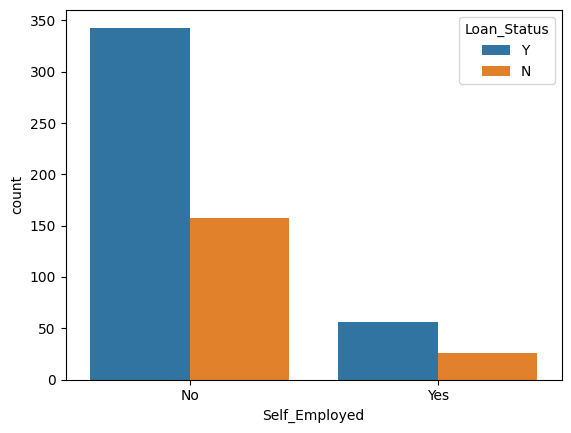

In [20]:
sns.countplot(df_data, x = 'Self_Employed', hue = 'Loan_Status')
plt.show()

### 3.9 Property Area

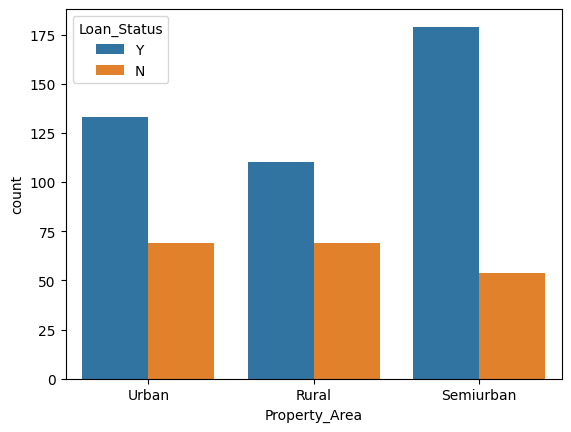

In [21]:
sns.countplot(df_data, x = 'Property_Area', hue = 'Loan_Status')
plt.show()

 ### 3.10 Credit History

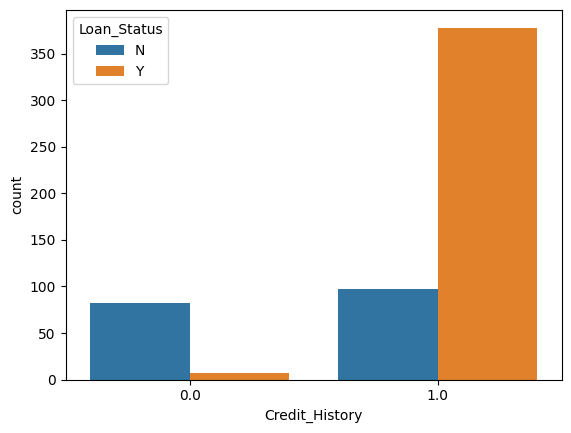

In [22]:
sns.countplot(df_data, x = 'Credit_History', hue = 'Loan_Status')
plt.show()

### 3.11 Loan Status (Label)

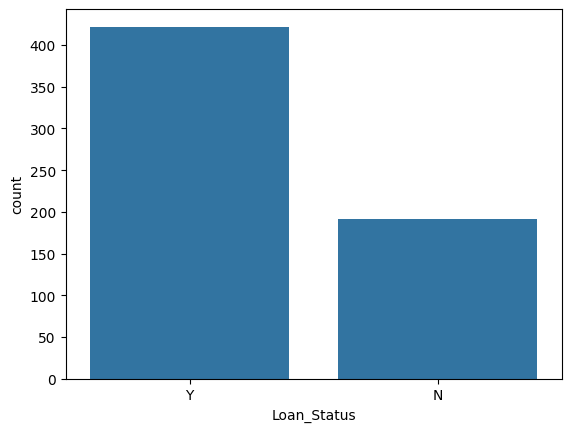

In [23]:
sns.countplot(df_data, x = 'Loan_Status')
plt.show()

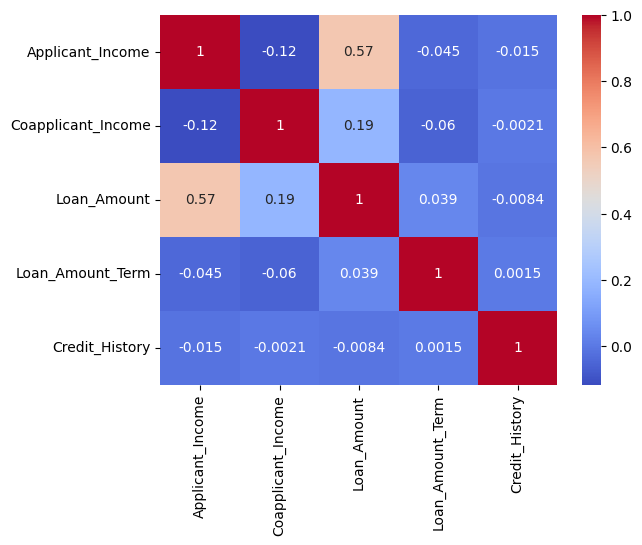

In [24]:
sns.heatmap(df_data[num_cols].corr(),annot = True,cmap = 'coolwarm')
plt.show()

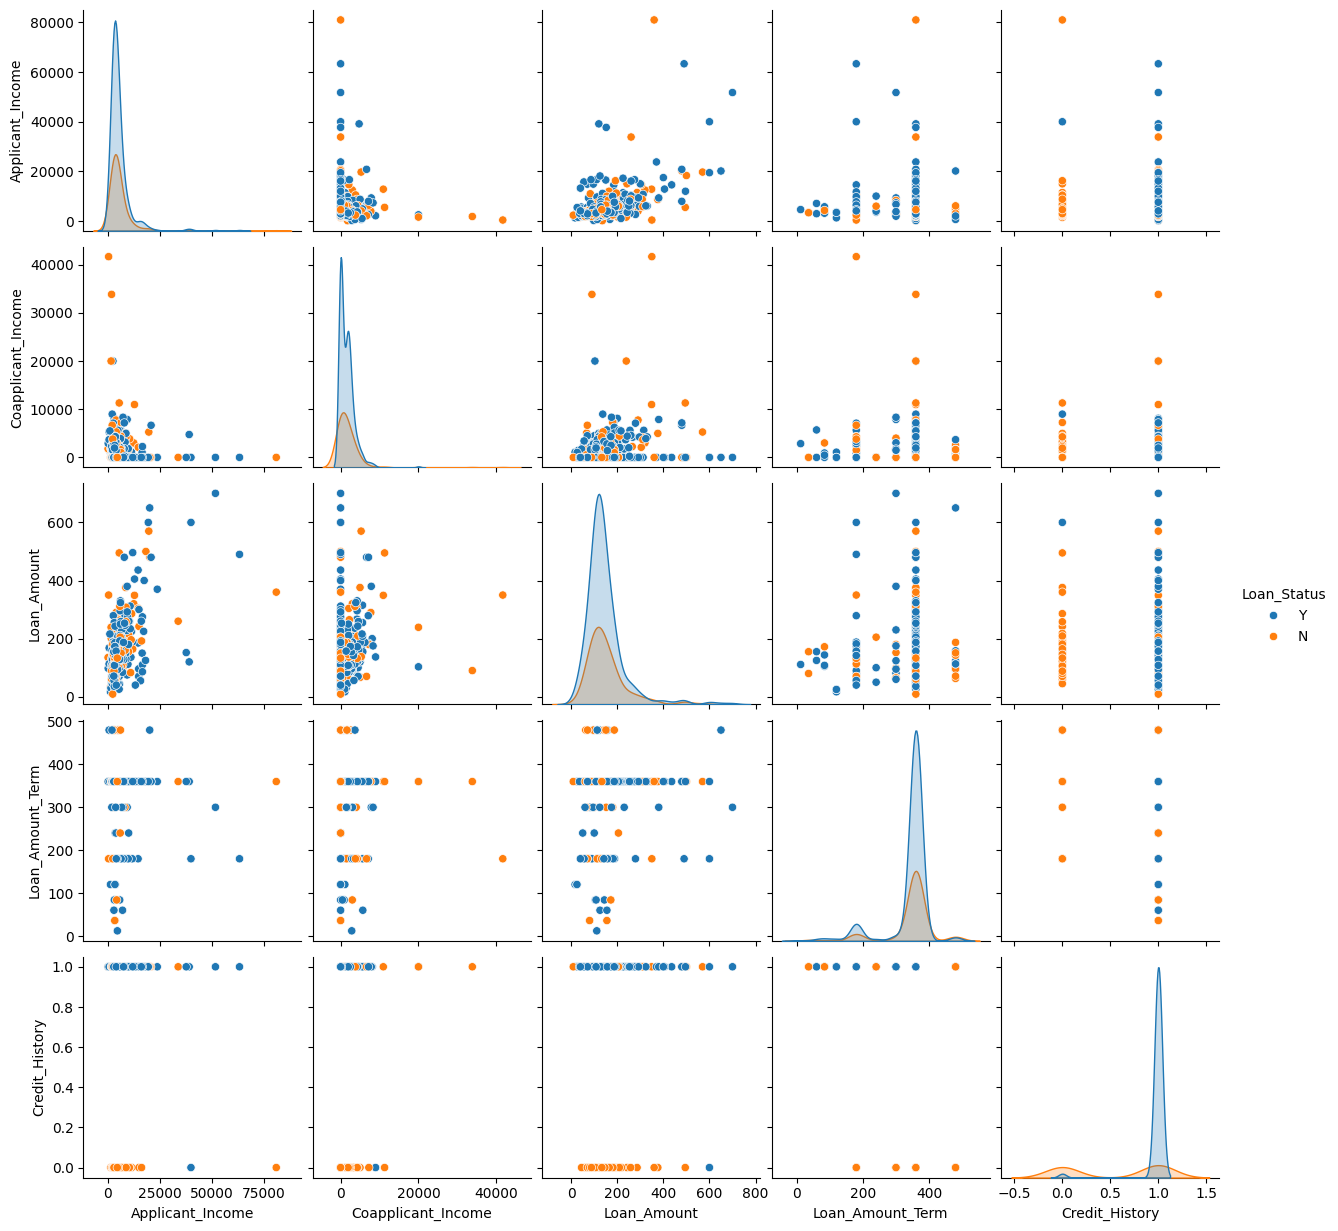

In [25]:
sns.pairplot(df_data,hue = 'Loan_Status')
plt.show()

## 4. Feature Engineering

### 4.1 Handling Missing Data

We would be doing static imputation since the expected values will be picked from the website form in real time

In [26]:
df_data.isnull().sum()

Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

Lets assume that if 'Married' column is empty, the person is not married

In [27]:
df_data['Married'] = df_data['Married'].fillna('No')

Lets impute with 0 for customers with no dependents

In [28]:
df_data['Dependents'] = df_data['Dependents'].fillna('0').astype('object')

Lets impute with 'No' for the missing information in 'Self_Employed' column

In [29]:
df_data['Self_Employed'] = df_data['Self_Employed'].fillna('No')

Let's impute Loan Amount and Loan Amount with median since median is robust to outliers

In [30]:
mean_loan = df_data['Loan_Amount'].mean()
median_loan = df_data['Loan_Amount'].median()
print(mean_loan,median_loan)

146.41216216216216 128.0


In [31]:
df_data['Loan_Amount']=df_data['Loan_Amount'].fillna(median_loan)

In [32]:
mean_term = df_data['Loan_Amount_Term'].mean()
median_term = df_data['Loan_Amount_Term'].median()
print(mean_term,median_term)

342.0 360.0


In [33]:
df_data['Loan_Amount_Term'] = df_data['Loan_Amount_Term'].fillna(median_term)

For the applications which are approved, we can consider that the Credit History is 1 and then we can remove rest of the few records which are not approved

In [34]:
df_data['Credit_History'] = df_data.apply(
    lambda row: 1.0 if pd.isna(row['Credit_History']) and row['Loan_Status'] == 'Y' else row['Credit_History']  ,
    axis = 1)

In [35]:
df_data.dropna(inplace = True)

### 4.2 Feature Creation

In [36]:
df_data['Total_Income'] = df_data['Applicant_Income'] + df_data['Coapplicant_Income']
df_data

,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


Average home loan interest is 8.5% per annum. Based on this, let us calculate the monthly EMI

In [37]:
def emi_calculator(principle,term):
  #interest = PNR/100
  interest = (principle * 1000 * 8.5 * term )/float(12*100)
  emi = ((principle*1000) + interest)/term
  return emi

In [38]:
df_data['EMI'] = df_data.apply(lambda row: emi_calculator(row['Loan_Amount'],row['Loan_Amount_Term']),axis =1)
df_data

,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI
0,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,1262.222222
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,1262.222222
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,650.833333
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,1183.333333
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,1390.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,700.138889
610,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,505.555556
611,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,2494.861111
612,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,1844.027778


In [39]:
df_data['Balance_Income'] = df_data['Total_Income'] - df_data['EMI']
df_data

,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI,Balance_Income
0,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,1262.222222,4586.777778
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,1262.222222,4828.777778
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,650.833333,2349.166667
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,1183.333333,3757.666667
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,1390.416667,4609.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,700.138889,2199.861111
610,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,505.555556,3600.444444
611,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,2494.861111,5817.138889
612,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,1844.027778,5738.972222


In [40]:
df_data = df_data.drop(columns = ['Applicant_Income','Coapplicant_Income','Loan_Amount','Loan_Amount_Term','Total_Income'])
df_data

,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,EMI,Balance_Income
0,No,0,Graduate,No,1.0,Urban,Y,1262.222222,4586.777778
1,Yes,1,Graduate,No,1.0,Rural,N,1262.222222,4828.777778
2,Yes,0,Graduate,Yes,1.0,Urban,Y,650.833333,2349.166667
3,Yes,0,Not Graduate,No,1.0,Urban,Y,1183.333333,3757.666667
4,No,0,Graduate,No,1.0,Urban,Y,1390.416667,4609.583333
...,...,...,...,...,...,...,...,...,...
609,No,0,Graduate,No,1.0,Rural,Y,700.138889,2199.861111
610,Yes,3+,Graduate,No,1.0,Rural,Y,505.555556,3600.444444
611,Yes,1,Graduate,No,1.0,Urban,Y,2494.861111,5817.138889
612,Yes,2,Graduate,No,1.0,Urban,Y,1844.027778,5738.972222


### 4.3 Encoding & Scaling

In [41]:
ord_cols = ['Married','Education','Self_Employed']
one_hot_cols = ['Dependents','Property_Area']

In [42]:
ordinal_encoder = OrdinalEncoder()
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

In [43]:
num_cols = ['EMI','Balance_Income']

In [44]:
df_data.shape

(601, 9)

In [45]:
x = df_data.drop(columns=['Loan_Status'])
x

,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,EMI,Balance_Income
0,No,0,Graduate,No,1.0,Urban,1262.222222,4586.777778
1,Yes,1,Graduate,No,1.0,Rural,1262.222222,4828.777778
2,Yes,0,Graduate,Yes,1.0,Urban,650.833333,2349.166667
3,Yes,0,Not Graduate,No,1.0,Urban,1183.333333,3757.666667
4,No,0,Graduate,No,1.0,Urban,1390.416667,4609.583333
...,...,...,...,...,...,...,...,...
609,No,0,Graduate,No,1.0,Rural,700.138889,2199.861111
610,Yes,3+,Graduate,No,1.0,Rural,505.555556,3600.444444
611,Yes,1,Graduate,No,1.0,Urban,2494.861111,5817.138889
612,Yes,2,Graduate,No,1.0,Urban,1844.027778,5738.972222


In [46]:
y=df_data['Loan_Status'].replace({'Y': 1, 'N': 0})
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 601, dtype: int64

In [47]:
pre_processor = ColumnTransformer([('ordinal', ordinal_encoder, ord_cols),
                                  ('one_hot', one_hot_encoder, one_hot_cols),
                                  ('scaling',StandardScaler(),num_cols)])

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=42, stratify = y)

## 5. Training and Testing Model

### 5.1 Logistic Regression

In [49]:
LR = LogisticRegression()

In [50]:
param_grid_1 = {
    'LogisticReg__C':[0.1,0.01,0.001],
    'LogisticReg__solver':['liblinear','lbfgs']
}

In [51]:
pipeline = Pipeline(steps = [('prepreocessor',pre_processor),
                             ('LogisticReg',LR)]
                    )


In [52]:
grid_search = GridSearchCV(estimator = pipeline,param_grid = param_grid_1,cv=5,scoring = 'f1')

In [53]:
x_train

,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,EMI,Balance_Income
452,Yes,0,Graduate,No,0.0,Rural,1469.305556,4211.694444
178,Yes,1,Graduate,No,1.0,Semiurban,1143.888889,2606.111111
302,No,0,Graduate,No,1.0,Rural,1301.666667,3698.333333
469,Yes,0,Graduate,No,1.0,Urban,1084.722222,5699.277778
608,Yes,0,Graduate,No,1.0,Rural,1065.000000,4117.000000
...,...,...,...,...,...,...,...,...
606,Yes,1,Graduate,No,1.0,Semiurban,1705.972222,4194.027778
323,No,0,Graduate,No,1.0,Rural,1301.666667,4849.333333
50,Yes,0,Not Graduate,No,1.0,Semiurban,986.111111,2585.888889
107,No,0,Not Graduate,No,1.0,Rural,1183.333333,6149.666667


In [54]:
y_train

452    0
178    1
302    1
469    0
608    1
      ..
606    1
323    1
50     1
107    0
218    0
Name: Loan_Status, Length: 480, dtype: int64

In [55]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prepreocessor',
                                        ColumnTransformer(transformers=[('ordinal',
                                                                         OrdinalEncoder(),
                                                                         ['Married',
                                                                          'Education',
                                                                          'Self_Employed']),
                                                                        ('one_hot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Dependents',
                                                                          'Property_Area']),
                                                                        ('scaling',
                                                                         StandardScaler(),
                                                                         ['EMI',
                                                                          'Balance_Income'])])),
                                       ('LogisticReg', LogisticRegression())]),
             param_grid={'LogisticReg__C': [0.1, 0.01, 0.001],
                         'LogisticReg__solver': ['liblinear', 'lbfgs']},
             scoring='f1')

In [56]:
best = grid_search.best_estimator_

In [57]:
y_pred = best.predict(x_test)

In [58]:
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.f1_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))

0.7024793388429752
0.8252427184466019
1.0
0.7024793388429752
0.5


In [59]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 0, 36],
       [ 0, 85]])

### 5.2 Random Forest Classifier

In [60]:
RFC = RandomForestClassifier()

In [61]:
pipeline_2 = Pipeline([('prepcocessor',pre_processor),
                       ('RandomForest',RFC)])

In [62]:
param_grid_2 = {'RandomForest__n_estimators':[20,50,80],
                'RandomForest__max_features':['sqrt','log2'],
                'RandomForest__max_depth':[4,5,6],
                'RandomForest__min_samples_split': [2, 5, 10],
                'RandomForest__min_samples_leaf': [1, 2, 4]}

In [63]:
score = ['f1','precision','roc_auc']

In [64]:
grid_search_2 = GridSearchCV(pipeline_2,param_grid=param_grid_2,scoring ='f1')

In [65]:
grid_search_2.fit(x_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('prepcocessor',
                                        ColumnTransformer(transformers=[('ordinal',
                                                                         OrdinalEncoder(),
                                                                         ['Married',
                                                                          'Education',
                                                                          'Self_Employed']),
                                                                        ('one_hot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Dependents',
                                                                          'Property_Area']),
                                                                        ('scaling',
                                                                         StandardScaler(),
                                                                         ['EMI',
                                                                          'Balance_Income'])])),
                                       ('RandomForest',
                                        RandomForestClassifier())]),
             param_grid={'RandomForest__max_depth': [4, 5, 6],
                         'RandomForest__max_features': ['sqrt', 'log2'],
                         'RandomForest__min_samples_leaf': [1, 2, 4],
                         'RandomForest__min_samples_split': [2, 5, 10],
                         'RandomForest__n_estimators': [20, 50, 80]},
             scoring='f1')

In [66]:
best_2 = grid_search_2.best_estimator_

In [67]:
grid_search_2.best_params_

{'RandomForest__max_depth': 4,
 'RandomForest__max_features': 'log2',
 'RandomForest__min_samples_leaf': 1,
 'RandomForest__min_samples_split': 10,
 'RandomForest__n_estimators': 50}

In [68]:
y_pred_2 = best_2.predict(x_test)

In [69]:
print(metrics.accuracy_score(y_test,y_pred_2))
print(metrics.f1_score(y_test,y_pred_2))
print(metrics.recall_score(y_test,y_pred_2))
print(metrics.precision_score(y_test,y_pred_2))
print(metrics.roc_auc_score(y_test,y_pred_2))

0.7024793388429752
0.8235294117647058
0.9882352941176471
0.7058823529411765
0.5080065359477124


In [70]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_2)
confusion_matrix

array([[ 1, 35],
       [ 1, 84]])

### 5.3 XG Boost Classifier

In [71]:
XG = XGBClassifier()

In [72]:
pipeline_3 = Pipeline([('prepcocessor',pre_processor),
                       ('XGBClassifier',XG)])

In [73]:
param_grid_3 = {'XGBClassifier__n_estimators': [20,50,80,100],
                'XGBClassifier__max_depth': [3, 4, 5],
                'XGBClassifier__learning_rate': [0.1, 0.05, 0.01],
                'XGBClassifier__reg_lambda': [0.1, 1.0, 5,10.0]}

In [74]:
grid_search_3 = GridSearchCV(pipeline_3,param_grid=param_grid_3,cv=3,scoring ='f1')

In [75]:
grid_search_3.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prepcocessor',
                                        ColumnTransformer(transformers=[('ordinal',
                                                                         OrdinalEncoder(),
                                                                         ['Married',
                                                                          'Education',
                                                                          'Self_Employed']),
                                                                        ('one_hot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Dependents',
                                                                          'Property_Area']),
                                                                        ('scaling',
                                                                         StandardScaler(),
                                                                         ['EMI',
                                                                          'Balance_Income'])])),
                                       ('XGBClassifier',
                                        XGBClassifier(base_score=None,
                                                      boo...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'XGBClassifier__learning_rate': [0.1, 0.05, 0.01],
                         'XGBClassifier__max_depth': [3, 4, 5],
                         'XGBClassifier__n_estimators': [20, 50, 80, 100],
                         'XGBClassifier__reg_lambda': [0.1, 1.0, 5, 10.0]},
             scoring='f1')

In [76]:
best_3 = grid_search_3.best_estimator_

In [77]:
grid_search_3.best_params_

{'XGBClassifier__learning_rate': 0.05,
 'XGBClassifier__max_depth': 3,
 'XGBClassifier__n_estimators': 20,
 'XGBClassifier__reg_lambda': 1.0}

In [78]:
y_pred_3 = best_3.predict(x_test)

In [79]:
print(metrics.accuracy_score(y_test,y_pred_3))
print(metrics.f1_score(y_test,y_pred_3))
print(metrics.recall_score(y_test,y_pred_3))
print(metrics.precision_score(y_test,y_pred_3))
print(metrics.roc_auc_score(y_test,y_pred_3))

0.7107438016528925
0.8292682926829268
1.0
0.7083333333333334
0.5138888888888888


In [80]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_3)
confusion_matrix

array([[ 1, 35],
       [ 0, 85]])

Saving the model for inferencing

In [81]:
import joblib
joblib.dump(best_2,'model_final.joblib')

['model_final.joblib']

Future Enhancements:

*   Since dataset count is less and negative class(not approved) is having less records, we can try doing minority orversampling techniques like SMOTE
*   Try more models such as SVC, Naive Bias Classifier






